In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
%matplotlib inline

In [2]:
bank_stocks=pd.read_pickle('all_banks')

In [12]:
import yfinance as yf

In [6]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2006,1,1)

In [16]:
BAC = yf.download("BAC",start=start, end=end)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BAC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-01-01 00:00:00 -> 2006-01-01 00:00:00)')


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC','C','MS','GS','JPM','MS','WFC']

In [57]:
bank_stocks.head(1)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   

Bank Ticker           ...     MS                                 WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume  Open   High   
Date                  ...                                                     
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.6  31.98   

Bank Ticker                        
Stock Info    Low Close    Volume  
Date                               
2006-01-03   31.2  31.9  11016400  

[1 rows x 30 columns]

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [59]:
bank_stocks.head(1)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   

Bank Ticker           ...     MS                                 WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume  Open   High   
Date                  ...                                                     
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.6  31.98   

Bank Ticker                        
Stock Info    Low Close    Volume  
Date                               
2006-01-03   31.2  31.9  11016400  

[1 rows x 30 columns]

In [34]:
banks

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [251]:
bank_stocks.xs(level='Stock Info',key='Close',axis=1).max()

Bank Ticker
BAC     47.08
C      492.90
GS     130.39
JPM     40.67
MS      59.19
WFC     31.90
dtype: float64

In [23]:
returns = pd.DataFrame()


In [177]:
x = bank_stocks.xs(level='Stock Info',key='Close',axis=1).pct_change()


Bank Ticker       BAC         C        GS       JPM        MS       WFC
Date                                                                   
2006-01-03        NaN       NaN       NaN       NaN       NaN       NaN
2006-01-04  -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05   0.001288  0.004961 -0.000393  0.003029  0.002742 -0.000951
2006-01-06  -0.001501  0.000000  0.014169  0.007046  0.001025  0.005714
2006-01-09   0.000644 -0.004731  0.012030  0.016242  0.010586  0.000000

In [189]:
x.apply(lambda x = x.columns + " Return")

SyntaxError: invalid syntax (1993792510.py, line 1)

In [11]:
for i in tickers:
    print(i,bank_stocks[i]['Close'].max())

BAC 54.9
C 564.1
MS 89.3
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [25]:
for i in tickers:
    returns[i + " Return"] = bank_stocks[i]['Close'].pct_change()




In [21]:
returns

Empty DataFrame
Columns: []
Index: []

In [29]:
bank_stocks[ticker]['Close']

NameError: name 'ticker' is not defined

In [11]:
import seaborn as sns


In [19]:
returns

Empty DataFrame
Columns: []
Index: []

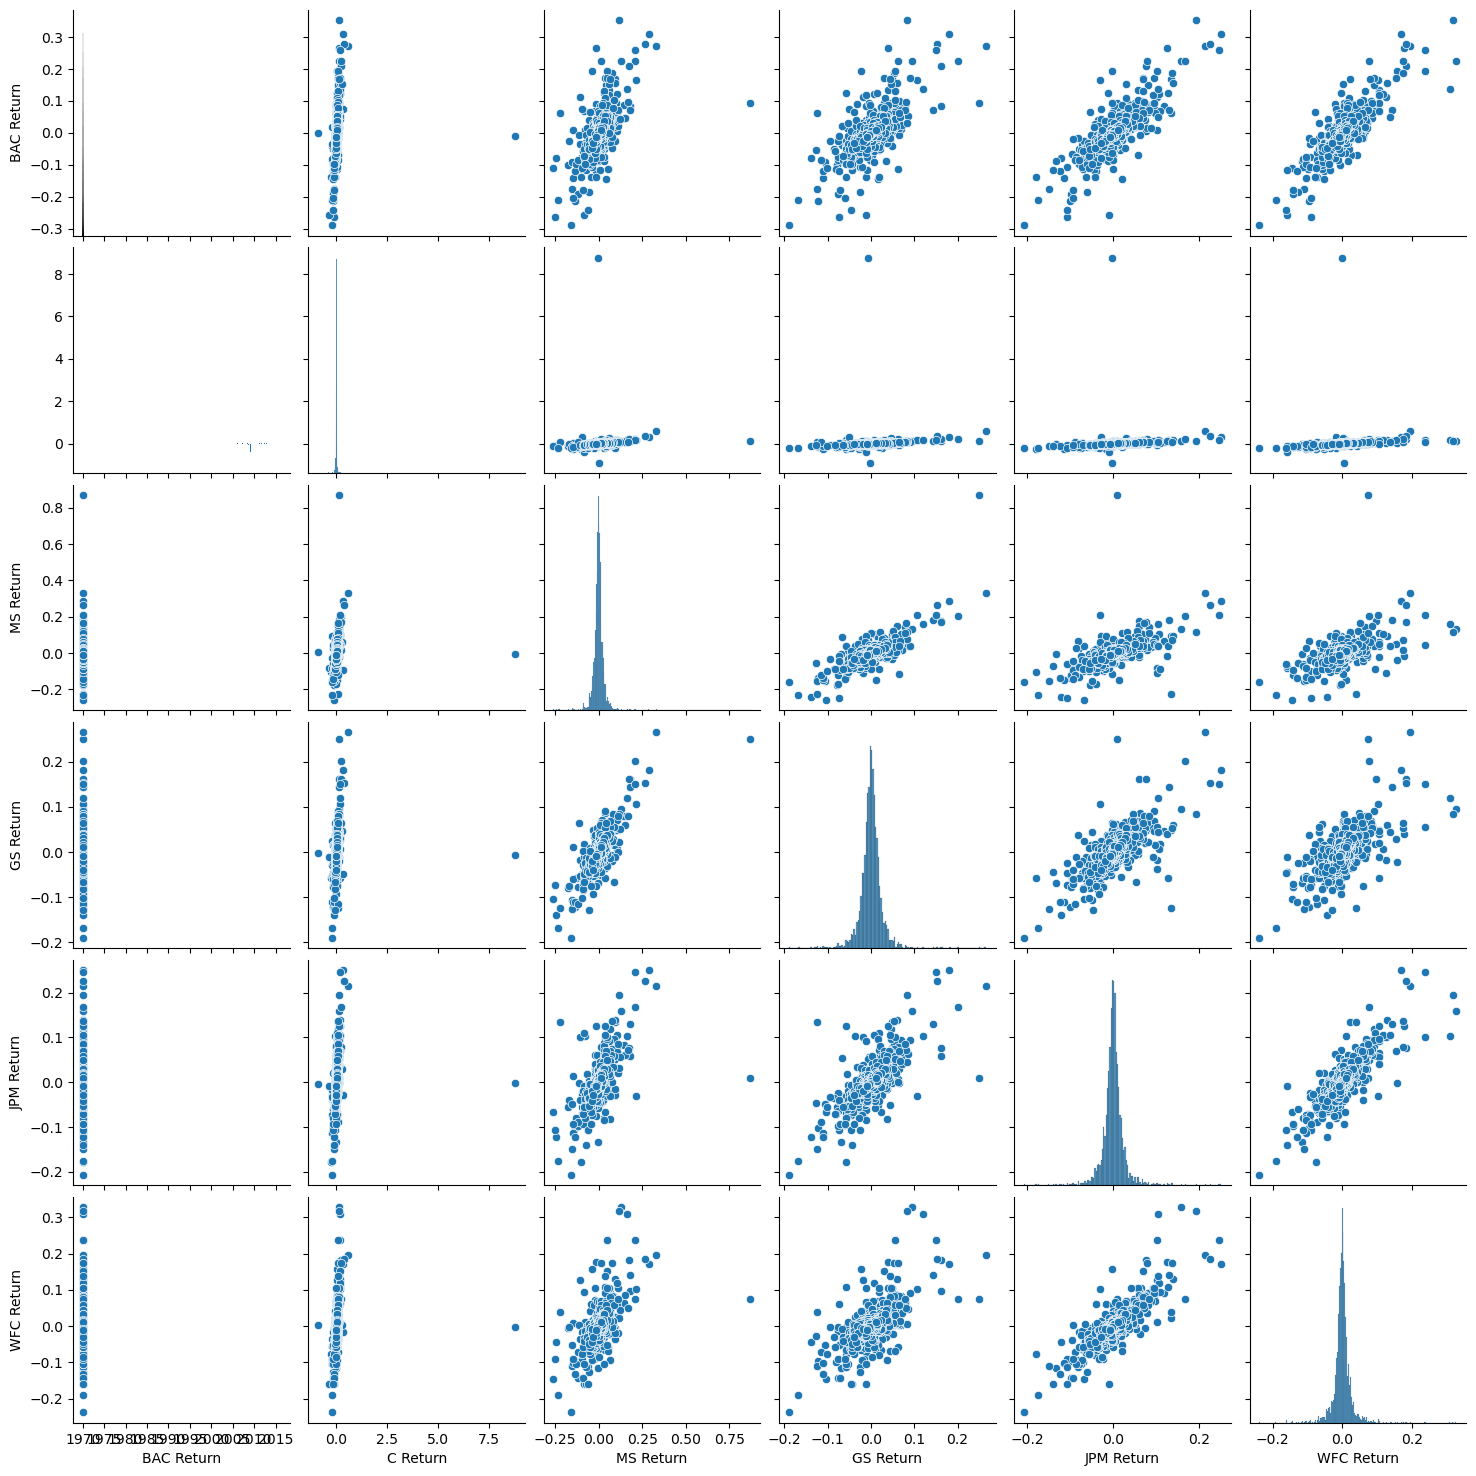

In [27]:
#returns[1:]
import seaborn as sns
g = sns.pairplot(returns.iloc[1:])
# After your existing pairplot code
g.axes[1,0].clear()  # Clear the specific plot cell (row 1, column 0)
g.axes[1,0].bar(returns.index, returns['C Return'])  # Create bar chart instead

import matplotlib.pyplot as plt
plt.show()

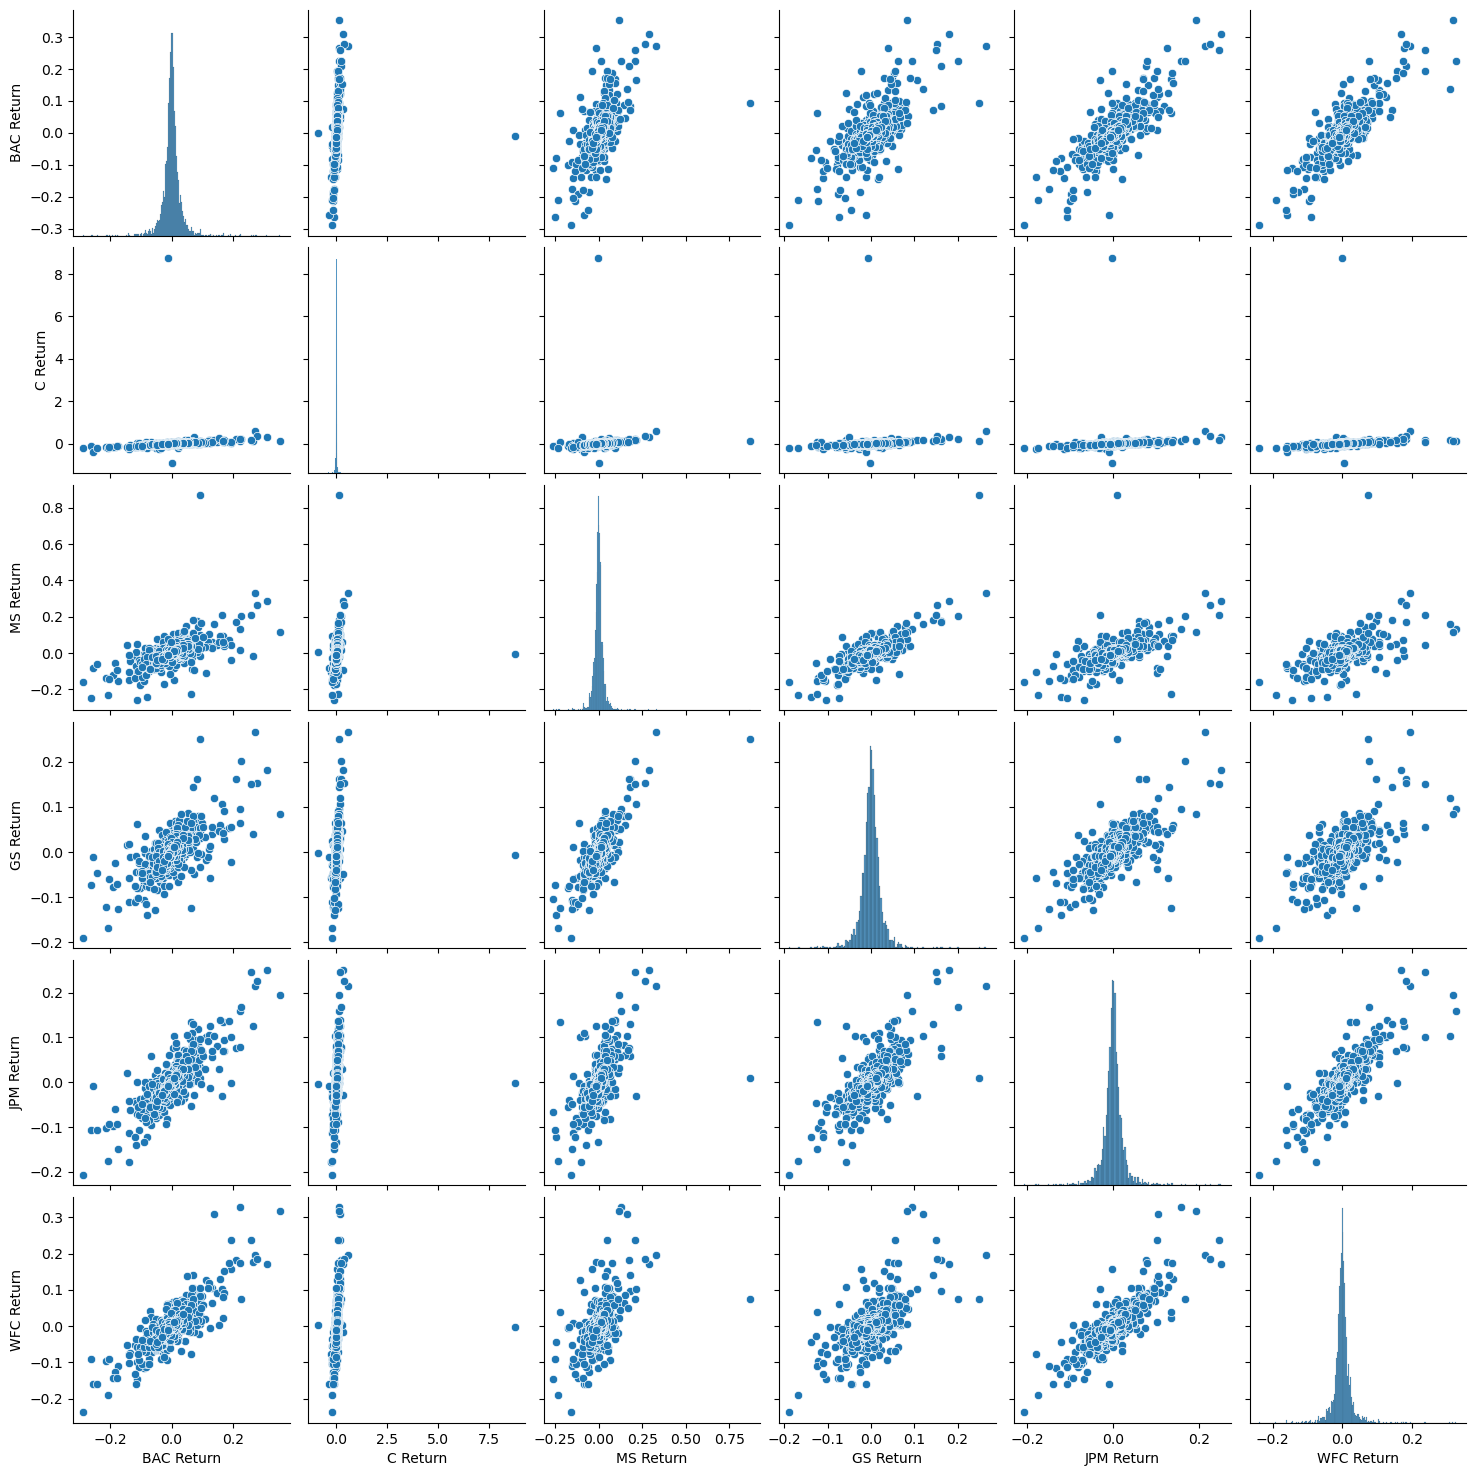

In [28]:
sns.pairplot(returns[1:],kind='scatter')
import matplotlib.pyplot as plt
plt.show()

In [27]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
MS Return    2008-10-09
GS Return    2009-01-20
JPM Return   2009-01-20
WFC Return   2009-01-20
dtype: datetime64[ns]

In [71]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
MS Return    2008-10-13
GS Return    2008-11-24
JPM Return   2009-01-21
WFC Return   2008-07-16
dtype: datetime64[ns]

In [73]:
returns.std()

BAC Return    0.036650
C Return      0.179969
MS Return     0.037820
GS Return     0.025346
JPM Return    0.027656
WFC Return    0.030233
dtype: float64

In [24]:
returns.head()

BAC Return  C Return  MS Return  GS Return  JPM Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN        NaN         NaN         NaN
2006-01-04   -0.010620 -0.018462   0.000686  -0.013812   -0.014183   -0.011599
2006-01-05    0.001288  0.004961   0.002742  -0.000393    0.003029   -0.000951
2006-01-06   -0.001501  0.000000   0.001025   0.014169    0.007046    0.005714
2006-01-09    0.000644 -0.004731   0.010586   0.012030    0.016242    0.000000

In [30]:
returns.loc['2015-01-01':'2015-12-31'].head()

BAC Return  C Return  MS Return  GS Return  JPM Return  WFC Return
Date                                                                          
2015-01-02    0.000559  0.002772  -0.002320   0.002992   -0.001438   -0.002189
2015-01-05   -0.029050 -0.031515  -0.031258  -0.031223   -0.031045   -0.027422
2015-01-06   -0.029919 -0.035205  -0.028800  -0.020229   -0.025929   -0.020865
2015-01-07    0.004745  0.009270   0.014278   0.014903    0.001526    0.005951
2015-01-08    0.020661  0.015048   0.014889   0.015965    0.022346    0.022137

In [52]:
returns.loc[:,'BAC Return':'MS Return']

BAC Return  C Return  MS Return
Date                                       
2006-01-03         NaN       NaN        NaN
2006-01-04   -0.010620 -0.018462   0.000686
2006-01-05    0.001288  0.004961   0.002742
2006-01-06   -0.001501  0.000000   0.001025
2006-01-09    0.000644 -0.004731   0.010586
...                ...       ...        ...
2015-12-24   -0.004037  0.001520  -0.003681
2015-12-28   -0.008107 -0.006261  -0.009544
2015-12-29    0.008757  0.011455   0.011812
2015-12-30   -0.013310 -0.012835  -0.009831
2015-12-31   -0.012903 -0.010516  -0.013031

[2517 rows x 3 columns]

In [ ]:
returns.loc[]

In [70]:
returns['Date'] = returns.index

In [17]:
D = returns['Date']

In [19]:
D = returns['Date'].apply(lambda x : x.year== 2015)

In [21]:
returns[returns['Date'].apply(lambda x : x.year == 2015)].std()['JPM Return']

0.014016843055878704

In [27]:
returns[D].std()

BAC Return                       0.016163
C Return                         0.015289
MS Return                        0.016249
GS Return                        0.014046
JPM Return                       0.014017
WFC Return                       0.012591
Date          104 days 20:04:55.551720886
dtype: object

In [29]:
returns.head()

BAC Return  C Return  MS Return  GS Return  JPM Return  \
Date                                                                 
2006-01-03         NaN       NaN        NaN        NaN         NaN   
2006-01-04   -0.010620 -0.018462   0.000686  -0.013812   -0.014183   
2006-01-05    0.001288  0.004961   0.002742  -0.000393    0.003029   
2006-01-06   -0.001501  0.000000   0.001025   0.014169    0.007046   
2006-01-09    0.000644 -0.004731   0.010586   0.012030    0.016242   

            WFC Return       Date  
Date                               
2006-01-03         NaN 2006-01-03  
2006-01-04   -0.011599 2006-01-04  
2006-01-05   -0.000951 2006-01-05  
2006-01-06    0.005714 2006-01-06  
2006-01-09    0.000000 2006-01-09

In [165]:
returns[returns['Date'].apply(lambda x:x.year == 2015)]['MS Return']

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
                ...   
2015-12-24   -0.003681
2015-12-28   -0.009544
2015-12-29    0.011812
2015-12-30   -0.009831
2015-12-31   -0.013031
Name: MS Return, Length: 252, dtype: float64

C:\Users\hypem\AppData\Local\Temp\ipykernel_90460\1907941335.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],bins=50,color='g')


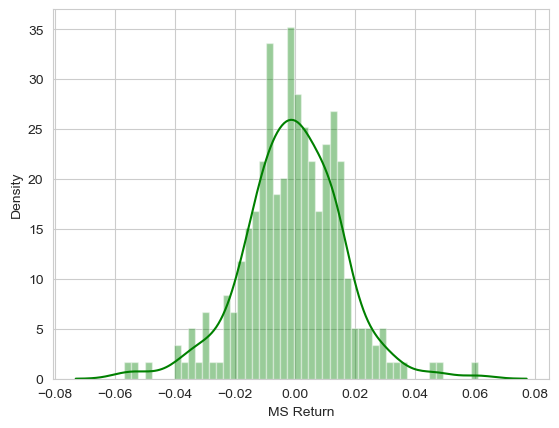

In [74]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],bins=50,color='g')
plt.show()

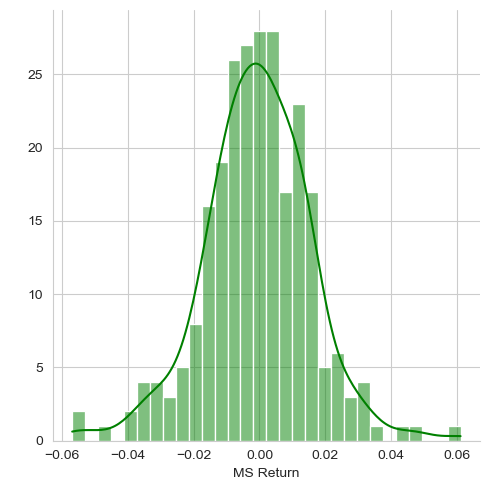

In [76]:
sns.set_style('whitegrid')
sns.displot(x=returns[returns['Date'].apply(lambda x:x.year == 2015)]['MS Return'], kde=True, color='green',bins=30)

plt.ylabel(' ')
plt.show()

C:\Users\hypem\AppData\Local\Temp\ipykernel_90460\2580020307.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],kde=True,color='r',bins=50)


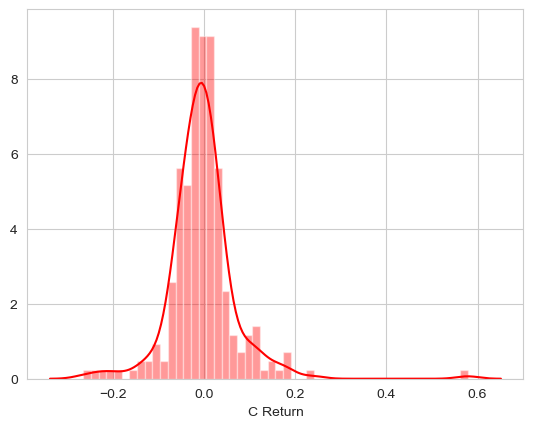

In [108]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],kde=True,color='r',bins=50)
plt.ylabel('')
plt.show()

In [100]:
returns.loc['2008-01-01':'2008-12-31']

BAC Return  C Return  MS Return  GS Return  JPM Return  \
Date                                                                 
2008-01-02   -0.016966 -0.017663  -0.040670  -0.034643   -0.033906   
2008-01-03   -0.006410  0.000346  -0.000196  -0.013295   -0.006877   
2008-01-04   -0.011166 -0.023851  -0.032195  -0.023970   -0.022684   
2008-01-07    0.001255  0.000708  -0.020081  -0.026009    0.010017   
2008-01-08   -0.037343 -0.039632  -0.039536  -0.026858   -0.039671   
...                ...       ...        ...        ...         ...   
2008-12-24    0.061176  0.039877   0.004155   0.016489    0.025421   
2008-12-26   -0.012565 -0.007375   0.010345  -0.006149   -0.001675   
2008-12-29   -0.031437 -0.023774   0.017065   0.007766   -0.000671   
2008-12-30    0.023184  0.035008   0.019463   0.071839    0.041303   
2008-12-31    0.063444 -0.013235   0.055958   0.028394    0.016769   

            WFC Return       Date  
Date                               
2008-01-02   -0.036105 2008-01-02  
2008-01-03   -0.019931 2008-01-03  
2008-01-04   -0.036115 2008-01-04  
2008-01-07    0.006912 2008-01-07  
2008-01-08   -0.042630 2008-01-08  
...                ...        ...  
2008-12-24    0.018155 2008-12-24  
2008-12-26    0.001092 2008-12-26  
2008-12-29    0.011632 2008-12-29  
2008-12-30    0.034854 2008-12-30  
2008-12-31    0.023611 2008-12-31  

[253 rows x 7 columns]

In [205]:
returns[returns['Date'].apply(lambda x: x.year == 2008)]

BAC Return  C Return  MS Return  GS Return  JPM Return  \
Date                                                                 
2008-01-02   -0.016966 -0.017663  -0.040670  -0.034643   -0.033906   
2008-01-03   -0.006410  0.000346  -0.000196  -0.013295   -0.006877   
2008-01-04   -0.011166 -0.023851  -0.032195  -0.023970   -0.022684   
2008-01-07    0.001255  0.000708  -0.020081  -0.026009    0.010017   
2008-01-08   -0.037343 -0.039632  -0.039536  -0.026858   -0.039671   
...                ...       ...        ...        ...         ...   
2008-12-24    0.061176  0.039877   0.004155   0.016489    0.025421   
2008-12-26   -0.012565 -0.007375   0.010345  -0.006149   -0.001675   
2008-12-29   -0.031437 -0.023774   0.017065   0.007766   -0.000671   
2008-12-30    0.023184  0.035008   0.019463   0.071839    0.041303   
2008-12-31    0.063444 -0.013235   0.055958   0.028394    0.016769   

            WFC Return       Date  
Date                               
2008-01-02   -0.036105 2008-01-02  
2008-01-03   -0.019931 2008-01-03  
2008-01-04   -0.036115 2008-01-04  
2008-01-07    0.006912 2008-01-07  
2008-01-08   -0.042630 2008-01-08  
...                ...        ...  
2008-12-24    0.018155 2008-12-24  
2008-12-26    0.001092 2008-12-26  
2008-12-29    0.011632 2008-12-29  
2008-12-30    0.034854 2008-12-30  
2008-12-31    0.023611 2008-12-31  

[253 rows x 7 columns]

In [193]:
returns

BAC Return  C Return  MS Return  GS Return  JPM Return  \
Date                                                                 
2006-01-03         NaN       NaN        NaN        NaN         NaN   
2006-01-04   -0.010620 -0.018462   0.000686  -0.013812   -0.014183   
2006-01-05    0.001288  0.004961   0.002742  -0.000393    0.003029   
2006-01-06   -0.001501  0.000000   0.001025   0.014169    0.007046   
2006-01-09    0.000644 -0.004731   0.010586   0.012030    0.016242   
...                ...       ...        ...        ...         ...   
2015-12-24   -0.004037  0.001520  -0.003681  -0.002624   -0.001948   
2015-12-28   -0.008107 -0.006261  -0.009544  -0.004658   -0.003303   
2015-12-29    0.008757  0.011455   0.011812   0.010516    0.010395   
2015-12-30   -0.013310 -0.012835  -0.009831  -0.008282   -0.007157   
2015-12-31   -0.012903 -0.010516  -0.013031  -0.009780   -0.008410   

            WFC Return       Date  
Date                               
2006-01-03         NaN 2006-01-03  
2006-01-04   -0.011599 2006-01-04  
2006-01-05   -0.000951 2006-01-05  
2006-01-06    0.005714 2006-01-06  
2006-01-09    0.000000 2006-01-09  
...                ...        ...  
2015-12-24   -0.003997 2015-12-24  
2015-12-28   -0.002554 2015-12-28  
2015-12-29    0.011156 2015-12-29  
2015-12-30   -0.007235 2015-12-30  
2015-12-31   -0.009656 2015-12-31  

[2517 rows x 7 columns]

C:\Users\hypem\AppData\Local\Temp\ipykernel_73596\1672628768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=returns[returns['Date'].apply(lambda x:x.year == 2008)]['C Return'],color='r')


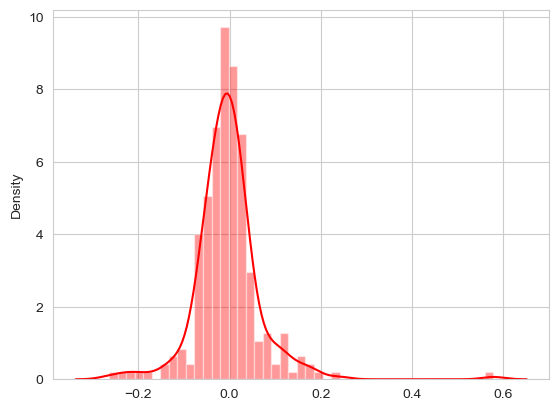

In [215]:
sns.distplot(x=returns[returns['Date'].apply(lambda x:x.year == 2008)]['C Return'],color='r')
plt.show()

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [227]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

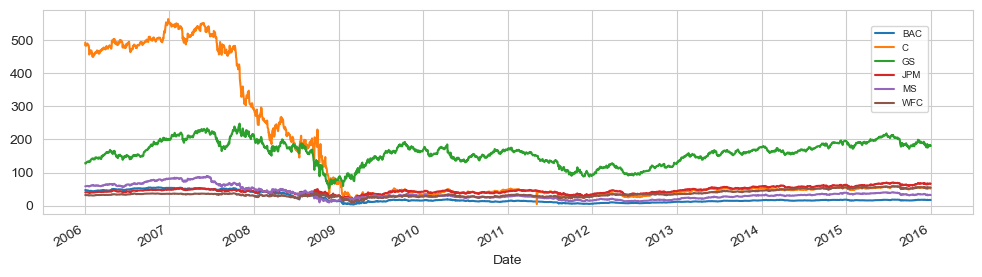

In [71]:

bank_stocks.xs(level ='Stock Info',key='Close',axis=1).plot(figsize=(12,3))
plt.legend(prop={'size':7},loc=(0.89,0.5))

plt.show()

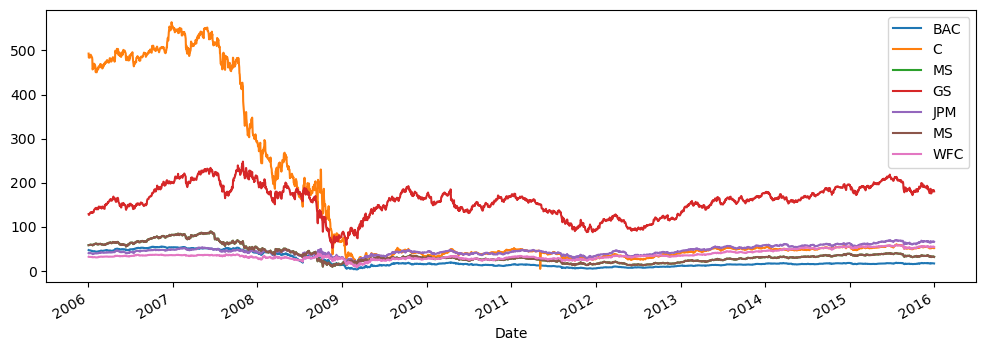

In [41]:
colors = {'C': 'green'}
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
    plt.legend(loc=('best'))
plt.show()

In [79]:
bank_stocks.xs(level='Stock Info',key='Close',axis=1)

Bank Ticker    BAC       C      GS    JPM     MS    WFC
Date                                                   
2006-01-03   47.08  492.90  128.87  40.19  58.31  31.90
2006-01-04   46.58  483.80  127.09  39.62  58.35  31.53
2006-01-05   46.64  486.20  127.04  39.74  58.51  31.50
2006-01-06   46.57  486.20  128.84  40.02  58.57  31.68
2006-01-09   46.60  483.90  130.39  40.67  59.19  31.68
...            ...     ...     ...    ...    ...    ...
2015-12-24   17.27   52.71  182.47  66.60  32.48  54.82
2015-12-28   17.13   52.38  181.62  66.38  32.17  54.68
2015-12-29   17.28   52.98  183.53  67.07  32.55  55.29
2015-12-30   17.05   52.30  182.01  66.59  32.23  54.89
2015-12-31   16.83   51.75  180.23  66.03  31.81  54.36

[2517 rows x 6 columns]

C:\Users\hypem\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



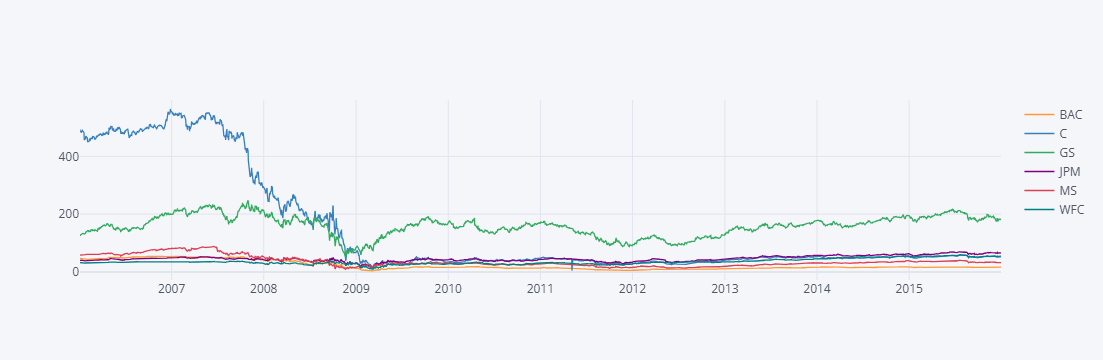

In [99]:
bank_stocks.xs(level='Stock Info',key='Close',axis=1).iplot()
plt.show()

In [85]:
bank_stocks.head(1)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   

Bank Ticker           ...     MS                                 WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume  Open   High   
Date                  ...                                                     
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.6  31.98   

Bank Ticker                        
Stock Info    Low Close    Volume  
Date                               
2006-01-03   31.2  31.9  11016400  

[1 rows x 30 columns]

In [45]:
bank_stocks['Date'] = bank_stocks.index

In [47]:
bank_stocks_2008 = bank_stocks[bank_stocks['Date'].apply(lambda x:x.year == 2008)]

In [49]:
bank_stocks_2008_close = bank_stocks_2008.xs(level='Stock Info',key='Close',axis=1)

In [51]:
bank_stocks_2008_BAC = bank_stocks_2008_close['BAC']

In [53]:
bank_stocks_2008_BAC.rolling(window=30).mean()

Date
2008-01-02          NaN
2008-01-03          NaN
2008-01-04          NaN
2008-01-07          NaN
2008-01-08          NaN
                ...    
2008-12-24    14.738667
2008-12-26    14.617333
2008-12-29    14.478667
2008-12-30    14.372667
2008-12-31    14.341000
Name: BAC, Length: 253, dtype: float64

In [67]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

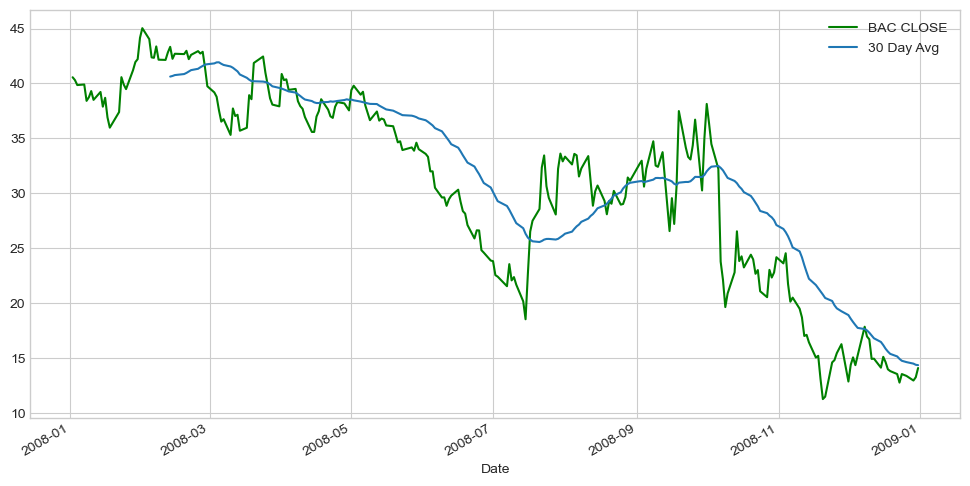

In [69]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,6))
bank_stocks_2008_BAC.plot(label='BAC CLOSE',color='green')
bank_stocks_2008_BAC.rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()
plt.show()

In [162]:
bank_stocks.head(1)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   

Bank Ticker           ...     MS                          WFC               \
Stock Info    Volume  ...   High    Low  Close   Volume  Open   High   Low   
Date                  ...                                                    
2006-01-03   1537660  ...  58.49  56.74  58.31  5377000  31.6  31.98  31.2   

Bank Ticker                       Date  
Stock Info  Close    Volume             
Date                                    
2006-01-03   31.9  11016400 2006-01-03  

[1 rows x 31 columns]

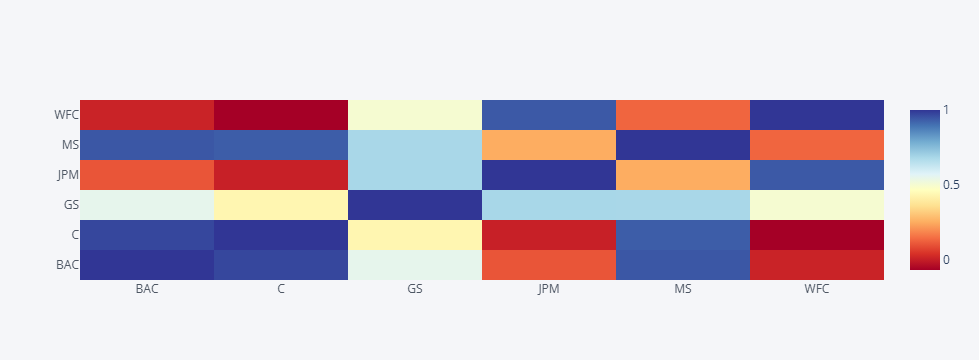

In [123]:
bank_stocks_close_corr = bank_stocks.xs(level='Stock Info',axis=1,key='Close').corr().iplot(kind='heatmap',colorscale='rdylbu')

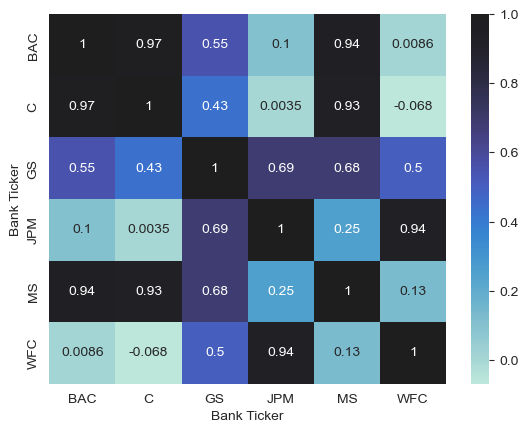

In [192]:
sns.heatmap(bank_stocks_close_corr,center=True,annot=True)
plt.show()

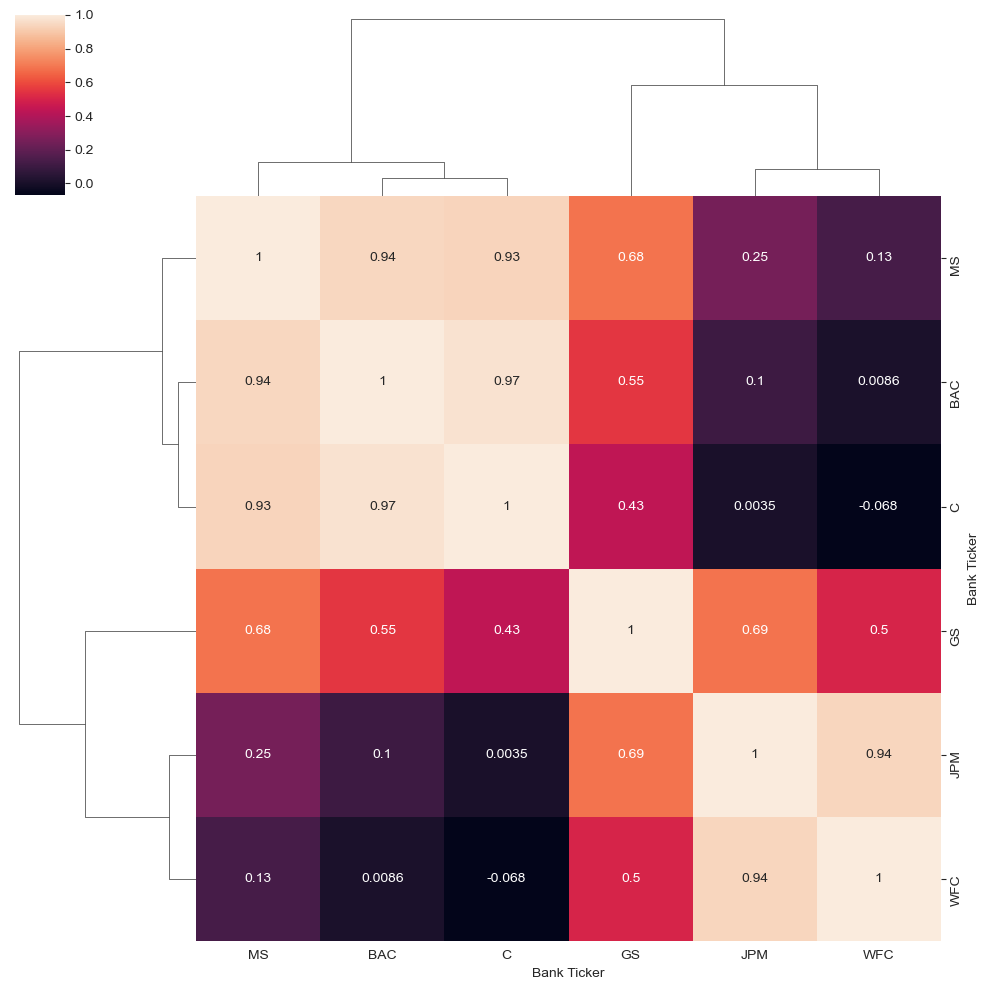

In [198]:
sns.clustermap(bank_stocks_close_corr,annot=True)
plt.show()

In [89]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2016,1,1)

In [91]:
bank_stocks['Date'][start:end]

Date
2015-01-02   2015-01-02
2015-01-05   2015-01-05
2015-01-06   2015-01-06
2015-01-07   2015-01-07
2015-01-08   2015-01-08
                ...    
2015-12-24   2015-12-24
2015-12-28   2015-12-28
2015-12-29   2015-12-29
2015-12-30   2015-12-30
2015-12-31   2015-12-31
Name: Date, Length: 252, dtype: datetime64[ns]

In [93]:
bank_stocks.head(1)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   

Bank Ticker           ...     MS                          WFC               \
Stock Info    Volume  ...   High    Low  Close   Volume  Open   High   Low   
Date                  ...                                                    
2006-01-03   1537660  ...  58.49  56.74  58.31  5377000  31.6  31.98  31.2   

Bank Ticker                       Date  
Stock Info  Close    Volume             
Date                                    
2006-01-03   31.9  11016400 2006-01-03  

[1 rows x 31 columns]

In [95]:
bank_stocks_BAC_2015 = bank_stocks[(bank_stocks.index.year == 2015) | (bank_stocks.index == '2016-01-01')]['BAC']

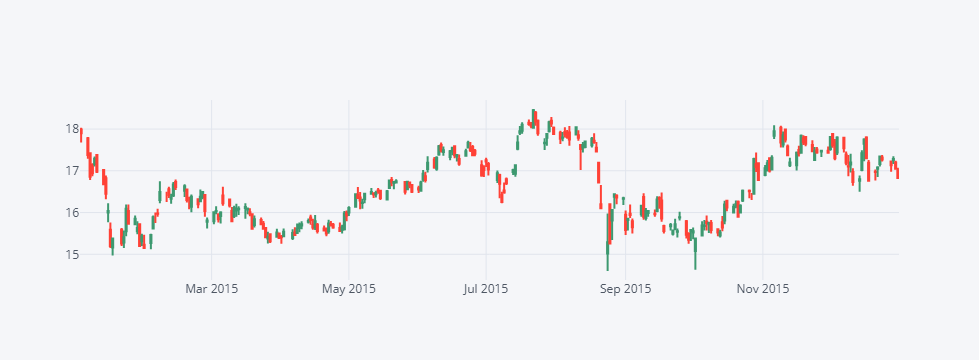

In [103]:
bank_stocks_BAC_2015.iplot(kind='candle')

In [127]:
bank_stocks_2015_Morgan = bank_stocks[bank_stocks.index.year == 2015]['MS']

C:\Users\hypem\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

C:\Users\hypem\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



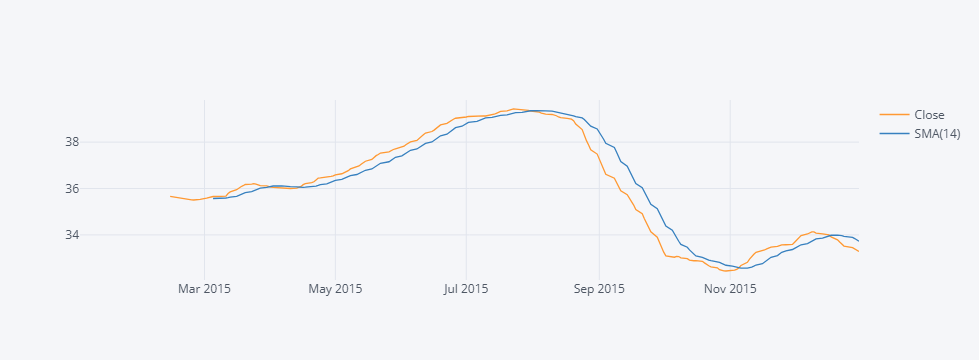

In [131]:
bank_stocks_2015_Morgan['Close'].rolling(window=30).mean().ta_plot(study='sma')

C:\Users\hypem\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



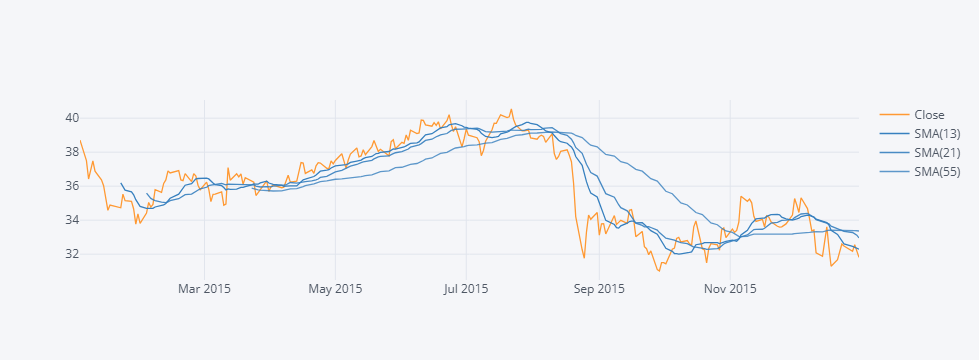

In [139]:
bank_stocks_2015_Morgan['Close'].ta_plot(study='sma',periods=[13,21,55])

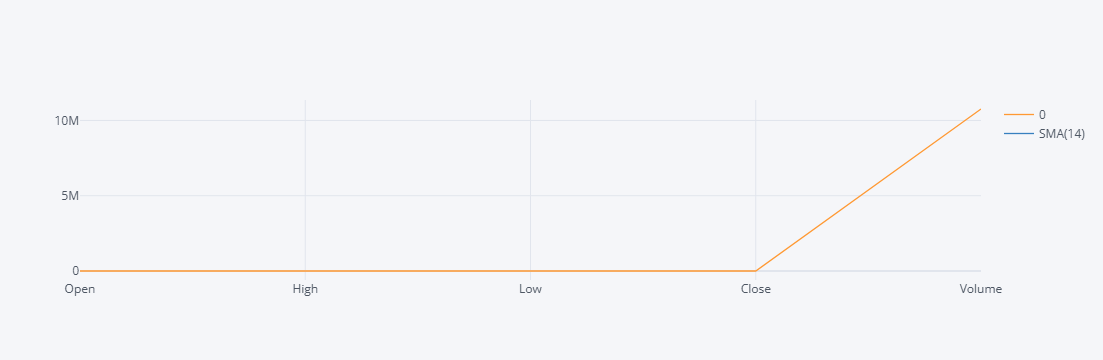

In [339]:
bank_stocks_2015_Morgan.mean().ta_plot(study='sma')

C:\Users\hypem\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

C:\Users\hypem\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



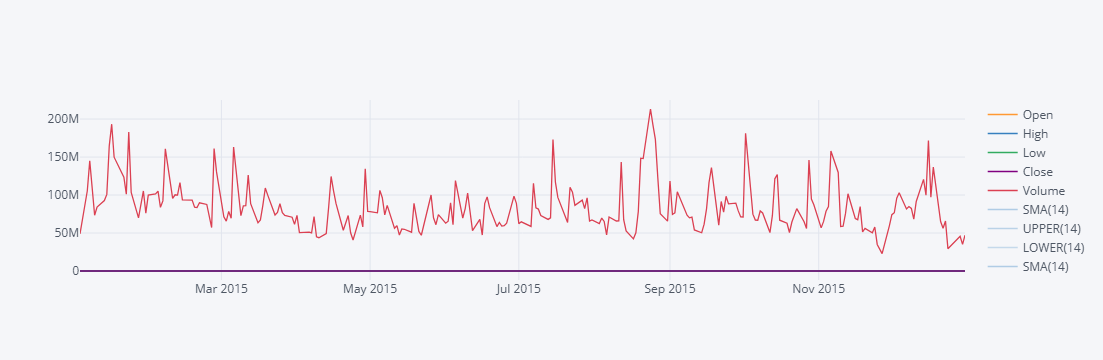

In [329]:
bank_stocks[bank_stocks.index.year == 2015]['BAC'].ta_plot(study='boll')